## Road Map

- Objective
> - cluster data points using centroids

- Clean Data
> - remove any non-int values
> - df.dropna( axis=1)
> - check datatypes and convert into int types if needed

- Prepare Data
> - convert features into an np.array
> - normalize data due to minimize the range of values

- Model
> - determine the number of clusters(n_clusters)
> - determine the method to initialize the clusters (init)
> - fit data using sklearn.cluster.KMeans()
> - create labels from the cluster and label each row in dataframe

- Evaluate
> - Can be done using cost function


---  
### Model

> From the docs

> - class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')

Parameters:

> - n_clusters : int, default=8

> The number of clusters to form as well as the number of centroids to generate.

> - init : {‘k-means++’, ‘random’, ndarray, callable}, default=’k-means++’
Method for initialization:

> - ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. See section Notes in k_init for more details.
> - ‘random’: choose n_clusters observations (rows) at random from data for the initial centroids.

> If an ndarray is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.

> If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.

> - n_init : int, default=10

> Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

> - labels_n : darray of shape (n_samples)

> Labels of each point


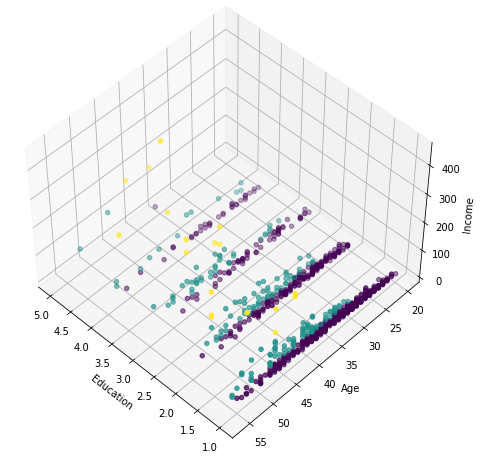

In [39]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import preprocessing, cluster
%matplotlib inline

# Clean
main = pd.read_csv('datasets/Cust_Segmentation.csv')
df = main.drop(columns=['Customer Id', 'Address'])
columns = ['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt','Defaulted', 'DebtIncomeRatio', 'cluster_KM']

# Prepare
x = df.values
x = np.nan_to_num(x)
cluster_ = preprocessing.StandardScaler().fit_transform(x)

# Model
k_means = cluster.KMeans(n_clusters=3, init="random", n_init=15)
# k_means = cluster.KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means.fit(x)
labels = k_means.labels_
df['cluster_KM'] = labels
df.columns


# Evaluate

from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(x[:, 1], x[:, 0], x[:, 3], c= labels.astype(np.float))

<h2>Disclaimer</h2>

This script was orginally from Coursera's [IBM AI Engineering course](https://www.coursera.org/professional-certificates/ai-engineer), authored by <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a> and was modifed to fit my needs. 